MLTSA UDel PHYS667 Sprint 2020

HW1 Extra Credit :

Solve Exercise 1, 2, 3 from https://arxiv.org/pdf/1008.4686.pdf

Exercise 1:

In [1]:
import pandas as pd
import pylab as pl
%pylab inline

# I have created a stylesheet to define default plot behaviors. 
# This stylesheet changes the default parameters stored in the dictionary matplitlib.rcParams
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


import data

In [2]:
exercise1 = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLTSA_RAmey/master/HW1EC/EC1Problem1.csv')
exercise1.head()

,ID,valx,valy,sigmay
0,5,203,495,21
1,6,58,173,1
2,7,210,479,27
3,8,202,504,14
4,9,198,510,30


plot the data and fit a line


shape of the input array X (16, 2)
shape of the input array y (16,)
The best fit parameters are: intercept 28.84, slope 2.22
The standard uncertainty on the slope is 157.63459213663506


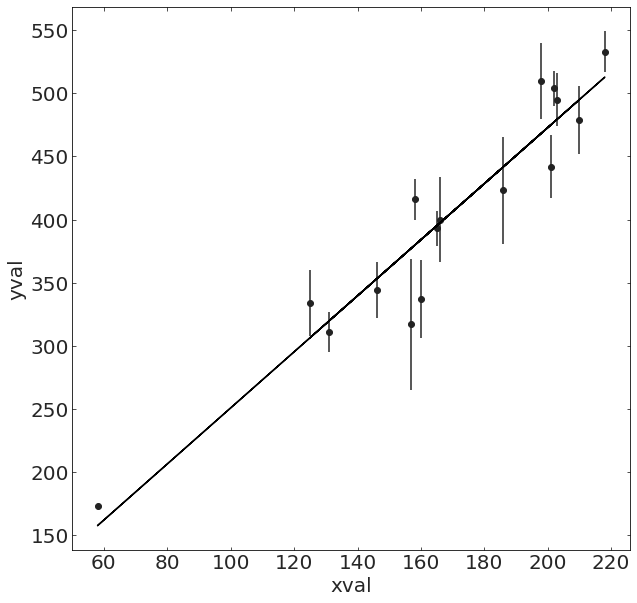

In [4]:
from scipy.optimize import minimize

y = exercise1.valy
x = np.column_stack((np.ones_like(y), exercise1.valx))
s = np.diag(exercise1.sigmay)

EQ1 = np.dot(x.T, np.dot(np.linalg.inv(s), x))
EQ2 = np.dot(x.T, np.linalg.solve(s,y))

X = np.linalg.solve(EQ1, EQ2)

b, m = X

theta_best = np.linalg.inv(x.T.dot(x)).dot((x.T).dot(y))

ax = pl.figure(figsize=(10,10)).add_subplot(111)
pl.scatter(exercise1.valx, exercise1.valy)
pl.errorbar(exercise1.valx, exercise1.valy, exercise1.sigmay, fmt='none')

print("shape of the input array X", x.shape)
print("shape of the input array y", y.shape)

def plotline(m, b, c, ls):
    x=exercise1.valx
    y=m*x+b
    ax.plot(x,y,color=c, linestyle=ls)

plotline(2.22, 28.84,'black', 'solid')

pl.ylabel("yval", fontsize=20)
pl.xlabel("xval", fontsize=20);

print("The best fit parameters are: " + 
      "intercept {:.2f}, slope {:.2f}".format(*theta_best))
print(fr"The standard uncertainty on the slope is {np.sqrt(EQ1[1,1])}")

Figure 1. Fitting a line to a subselection of datapoints in Table 1 in Hogg et al., 2010. 



Exercise 2: 

shape of the input array X (16, 2)
shape of the input array y (16,)
The best fit parameters are: intercept 310.02, slope 0.63
The standard uncertainty on the slope is 182.8710320392685


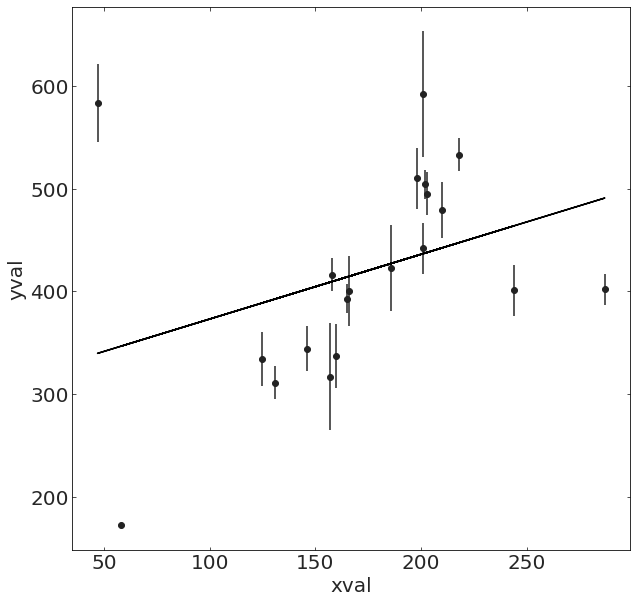

In [5]:
#import data
exercise2 = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLTSA_RAmey/master/HW1EC/EC1Problem2.csv')
exercise2.head()

#plot the data and line using the same method as above

y2 = exercise2.valy
x2 = np.column_stack((np.ones_like(y2), exercise2.valx))
s2 = np.diag(exercise2.sigmay)

EQ1 = np.dot(x2.T, np.dot(np.linalg.inv(s2), x2))
EQ2 = np.dot(x2.T, np.linalg.solve(s2,y2))

X = np.linalg.solve(EQ1, EQ2)

b, m = X

theta_best = np.linalg.inv(x2.T.dot(x2)).dot((x2.T).dot(y2))
                                           

#def line(x, intercept, slope):
 #   return slope * x + intercept

ax = pl.figure(figsize=(10,10)).add_subplot(111)
pl.scatter(exercise2.valx, exercise2.valy)
pl.errorbar(exercise2.valx, exercise2.valy, exercise2.sigmay, fmt='none')

print("shape of the input array X", x.shape)
print("shape of the input array y", y.shape)


def plotline(m, b, c, ls):
    x=exercise2.valx
    y=m*x+b
    ax.plot(x,y,color=c, linestyle=ls)

plotline(.63, 310.02,'black', 'solid')

pl.ylabel("yval", fontsize=20)
pl.xlabel("xval", fontsize=20);

print("The best fit parameters are: " + 
      "intercept {:.2f}, slope {:.2f}".format(*theta_best))
print(fr"The standard uncertainty on the slope is {np.sqrt(EQ1[1,1])}")

Figure 2. Fitting a line to all datapoints in Table 1 in Hogg et al., 2010. This fit is not as accurate as there are datapoints that seem to be outliers. This can increase the uncertainty of the line fit and overall error. 


Exercise 3: 

KeyError: ignored

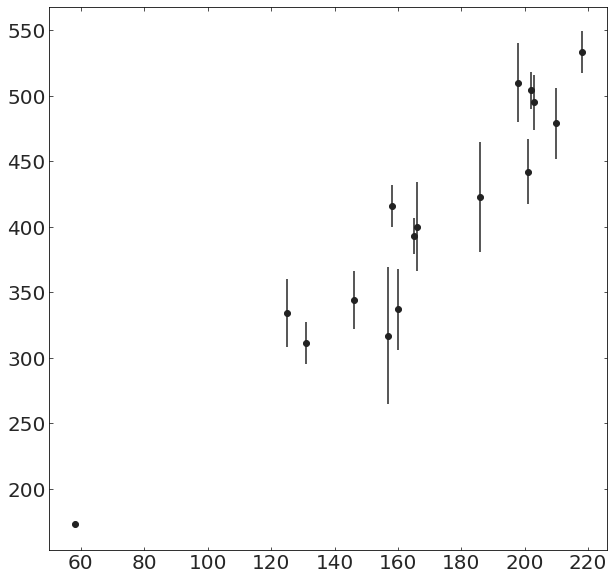

In [7]:
#import data
exercise3 = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLTSA_RAmey/master/HW1EC/EC1Problem3.csv')
exercise3.head()

#plot the data and line using the same method as above

from scipy.optimize import minimize

y3 = exercise3.valy
x3 = np.column_stack((np.ones_like(y3), (exercise3.valx)**2))
s3 = np.diag(exercise3.sigmay)

EQ1 = np.dot(x3.T, np.dot(np.linalg.inv(s3), x3))
EQ2 = np.dot(x3.T, np.linalg.solve(s3,y3))

X = np.linalg.solve(EQ1, EQ2)

theta_best = np.linalg.inv(x3.T.dot(x3)).dot((x3.T).dot(y3))

ax = pl.figure(figsize=(10,10)).add_subplot(111)
pl.scatter(exercise3.valx, exercise3.valy)
pl.errorbar(exercise3.valx, exercise3.valy, exercise3.sigmay, fmt='none')

y = 178.66 + .01*exercise3.valx + exercise3.Q*(exercise3.valx**2)

exercise3.plot(exercise3.valx,y)
    
pl.ylabel("yval", fontsize=20)
pl.xlabel("xval", fontsize=20);

print("The best fit parameters are: " + 
      "intercept {:.2f}, slope {:.2f}".format(*theta_best))